# Plot results for different Policies (F1 Score)

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import pandas as pd

%matplotlib inline  
import matplotlib.pyplot as plt

In [66]:
#  Budget Allocation Heuristics
def plot_heuristics(file_name, b_per_item, title, ylim = None):
    df = pd.read_csv('../output/{}'.format(file_name))
#     df['f1_mean'] = 2*df['precision_mean']*df['recall_mean'] / (df['precision_mean'] + df['recall_mean'] )
    df['f_beta_std'] = df['f1_std']
    algos = ['uncertainty_sampling', 'random_sampling']
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,6))    
    markers = ['X', 'o', '^']
    for alg, c, l, m in zip(algos, ['m', 'b', 'black'], ['--', '-.', '-'], markers):
        x = df.loc[(df['active_learning_strategy'] == alg) & (df['budget_per_item_mean'] == b_per_item) & (df['AL_switch_point_mean'] != -1)]['AL_switch_point_mean'].values 
        y = df.loc[(df['active_learning_strategy'] == alg)  & (df['budget_per_item_mean'] == b_per_item) & (df['AL_switch_point_mean'] != -1)]['f1_mean'].values
        y_std = df.loc[(df['active_learning_strategy'] == alg)  & (df['budget_per_item_mean'] == b_per_item) & (df['AL_switch_point_mean'] != -1)]['f_beta_std'].values
        ax.plot(x, y, label=alg, color=c, linestyle=l, marker=m)
        ax.errorbar(x, y, yerr=y_std, marker=m, linestyle=l, color=c)
        ax.set_xlabel('% of Budget to AL', size=14)
        
        ax.set_ylabel('F1', size=14)
        ax.set_title(title, size=15)
        
    #   Drow SM-run line
    ax.axhline(y=df.loc[(df['AL_switch_point_mean'] == 0) & (df['budget_per_item_mean'] == b_per_item)]['f1_mean'].values[0], linestyle='-', label='SM-Run', color='darkorange')
#     #   Drow Adaptive Policy line
#     ax.axhline(y=df.loc[(df['AL_switch_point_mean'] == -1) & (df['budget_per_item_mean'] == b_per_item)]['f1_mean'].values[0], label='Adaptive Policy', dashes=[13,6,3,6,13,8], color='g')
    
    ax.legend( fontsize=12)
    if ylim:
        plt.ylim(ylim)
        
        
# Classification cost       
def plot_clf_cost(file_name, b_per_item, title, ylim = None):
    df = pd.read_csv('../output/{}'.format(file_name))
#     df['f1_mean'] = 2*df['precision_mean']*df['recall_mean'] / (df['precision_mean'] + df['recall_mean'] )
    df['f_beta_std'] = df['f1_std']
    algos = ['uncertainty_sampling', 'random_sampling']
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,6))    
    markers = ['X', 'o', '^']
    for alg, c, l, m in zip(algos, ['m', 'b', 'black'], ['--', '-.', '-'], markers):
        x = df.loc[(df['active_learning_strategy'] == alg) & (df['budget_per_item_mean'] == b_per_item) & (df['AL_switch_point_mean'] != -1)]['budget_spent_per_item_mean'].values 
        y = df.loc[(df['active_learning_strategy'] == alg) & (df['budget_per_item_mean'] == b_per_item) & (df['AL_switch_point_mean'] != -1)]['f1_mean'].values
        y_std = df.loc[(df['active_learning_strategy'] == alg) & (df['budget_per_item_mean'] == b_per_item) & (df['AL_switch_point_mean'] != -1)]['f_beta_std'].values
        ax.plot(x, y, label=alg, color=c, linestyle=l, marker=m)
        ax.errorbar(x, y, yerr=y_std, marker=m, linestyle=l, color=c)
        ax.set_xlabel('Classification Cost', size=14)
        ax.set_ylabel('F1', size=14)
        ax.set_title(title, size=14)
    
    # Plot SM-Run dot
    x_smr = df.loc[(df['AL_switch_point_mean'] == 0) & (df['budget_per_item_mean'] == b_per_item)]['budget_spent_per_item_mean'].values[0]
    y_smr = df.loc[(df['AL_switch_point_mean'] == 0) & (df['budget_per_item_mean'] == b_per_item)]['f1_mean'].values[0]
    y_smr_std = df.loc[(df['AL_switch_point_mean'] == 0) & (df['budget_per_item_mean'] == b_per_item)]['f_beta_std'].values[0]
    ax.plot(x_smr, y_smr, label='SM-run', color='darkorange', marker='<', markersize=10)
    ax.errorbar(x_smr, y_smr, yerr=y_smr_std, color='darkorange', marker='<', linestyle='-')
    
#     # Plot Adaptive Policy
#     x_adp = df.loc[(df['AL_switch_point_mean'] == -1) & (df['budget_per_item_mean'] == b_per_item) & (df['active_learning_strategy'] == 'uncertainty_sampling')]['budget_spent_per_item_mean'].values
#     y_adp = df.loc[(df['AL_switch_point_mean'] == -1) & (df['budget_per_item_mean'] == b_per_item) & (df['active_learning_strategy'] == 'uncertainty_sampling')]['f1_mean'].values
#     y_adp_std = df.loc[(df['AL_switch_point_mean'] == -1) & (df['budget_per_item_mean'] == b_per_item) & (df['active_learning_strategy'] == 'uncertainty_sampling')]['f_beta_std'].values
#     ax.plot(x_adp, y_adp, label='Adaptive Policy', color='g', marker='>', markersize=10)
#     ax.errorbar(x_adp, y_adp, yerr=y_adp_std, color='g', marker='>', linestyle='-')
    ax.legend( fontsize=12)
    if ylim:
        plt.ylim(ylim)
        
# Vary available Budget 
def plot_budget(file_name, title, switch_points, alg, ylim = None):
    df = pd.read_csv('../output/{}'.format(file_name))
    df['AL_switch_point_mean'] = round(df['AL_switch_point_mean'], 1)
    #     df['f1_mean'] = 2*df['precision_mean']*df['recall_mean'] / (df['precision_mean'] + df['recall_mean'] )
    df['f_beta_std'] = df['f1_std']
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,6))    
    markers = ['X', 'o', '^', '>']
    colors = ['b', 'm', 'black', 'g']
    for switch_point, l, m, c in zip(switch_points, ['--', '-.', ':', '-'], markers, colors):
        x = df.loc[(df['active_learning_strategy'] == alg) & (df['AL_switch_point_mean'] == switch_point)]['budget_per_item_mean'].values 
        y = df.loc[(df['active_learning_strategy'] == alg)  & (df['AL_switch_point_mean'] == switch_point)]['f1_mean'].values 
        y_std = df.loc[(df['active_learning_strategy'] == alg)  & (df['AL_switch_point_mean'] == switch_point)]['f_beta_std'].values 
        if switch_point == -1:
            x = df.loc[(df['active_learning_strategy'] == alg) & (df['AL_switch_point_mean'] == switch_point)]['budget_per_item_mean'].values[-7:]  
            y = df.loc[(df['active_learning_strategy'] == alg)  & (df['AL_switch_point_mean'] == switch_point)]['f1_mean'].values[-7:] 
            y_std = df.loc[(df['active_learning_strategy'] == alg)  & (df['AL_switch_point_mean'] == switch_point)]['f_beta_std'].values[-7:] 
            ax.plot(x, y, color=c, linestyle=l, marker=m, label='Adaptive Policy')
        else:
            ax.plot(x, y, color=c, linestyle=l, marker=m, label='{}% of Budget to AL'.format(switch_point))
        ax.errorbar(x, y, yerr=y_std, marker=m, linestyle=l, color=c)
        ax.set_xlabel('Budget Available (per item)', size=14)
        ax.set_ylabel('F1', size=14)
        ax.set_title(title, size=14)

    #     Drow SM-run line
    x = df.loc[df['AL_switch_point_mean'] == 0.]['budget_per_item_mean'].values[-7:] 
    y = df.loc[df['AL_switch_point_mean'] == 0.]['f1_mean'].values[-7:] 
    y_std = df.loc[df['AL_switch_point_mean'] == 0.]['f_beta_std'].values[-7:] 
    ax.plot(x, y, color='darkorange', marker='*', label='SM-Run', dashes=[3,6,3,6,3,8])
    ax.errorbar(x, y, yerr=y_std, marker='*', dashes=[3,6,3,6,3,8], color='darkorange')
    ax.legend( fontsize=12)
    if ylim:
        plt.ylim(ylim)

        
# # Vary available Budget 
# def plot_crowd_acc(file_name, b_per_item, title, switch_points, alg, ylim = None):
#     df = pd.read_csv('../output/{}'.format(file_name))
#     df['f1_mean'] = 2*df['precision_mean']*df['recall_mean'] / (df['precision_mean'] + df['recall_mean'] )
#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,6))    
#     markers = ['X', 'o', '^', '>']
#     colors = ['b', 'm', 'black', 'g']
#     for switch_point, l, m, c in zip(switch_points, ['--', '-.', ':', '-'], markers, colors):
#         x = df.loc[(df['active_learning_strategy'] == alg) & (df['AL_switch_point_mean'] == switch_point)]['crowd_accuracy'].values
#         y = df.loc[(df['active_learning_strategy'] == alg)  & (df['AL_switch_point_mean'] == switch_point)]['f1_mean'].values
#         y_std = df.loc[(df['active_learning_strategy'] == alg)  & (df['AL_switch_point_mean'] == switch_point)]['f_beta_std'].values
#         if switch_point == -1:
#             x = df.loc[(df['active_learning_strategy'] == alg) & (df['AL_switch_point_mean'] == switch_point)]['crowd_accuracy'].values  
#             y = df.loc[(df['active_learning_strategy'] == alg)  & (df['AL_switch_point_mean'] == switch_point)]['f1_mean'].values
#             y_std = df.loc[(df['active_learning_strategy'] == alg)  & (df['AL_switch_point_mean'] == switch_point)]['f_beta_std'].values
#             ax.plot(x, y, color=c, linestyle=l, marker=m, label='Adaptive Policy')
#         else:
#             ax.plot(x, y, color=c, linestyle=l, marker=m, label='{}% of Budget to AL'.format(switch_point))
#         ax.errorbar(x, y, yerr=y_std, marker=m, linestyle=l, color=c)
#         ax.set_xlabel('Crowd Accuracy', size=14)
#         ax.set_ylabel('F1', size=14)
#         ax.set_title(title, size=14)
        
# #     Drow SM-run line
#     x = df.loc[df['AL_switch_point_mean'] == 0.]['crowd_accuracy'].values
#     y = df.loc[df['AL_switch_point_mean'] == 0.]['f1_mean'].values
#     y_std = df.loc[df['AL_switch_point_mean'] == 0.]['f_beta_std'].values
#     ax.plot(x, y, color='darkorange', marker='*', label='SM-Run', dashes=[3,6,3,6,3,8])
#     ax.errorbar(x, y, yerr=y_std, marker='*', dashes=[3,6,3,6,3,8], color='darkorange')
#     ax.legend( fontsize=12)
#     if ylim:
#         plt.ylim(ylim)
        
        

# # Classification cost vs Crowd accuracy       
# def plot_clf_cost_crowd_acc(file_name, b_per_item, title, switch_points, alg, ylim = None):
#     df = pd.read_csv('../output/{}'.format(file_name))
#     df['f1_mean'] = 2*df['precision_mean']*df['recall_mean'] / (df['precision_mean'] + df['recall_mean'] )
#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,6))    
#     markers = ['X', 'o', '^', '>']
#     colors = ['darkorange', 'b', 'black', 'g']
#     for switch_point, l, m, c in zip(switch_points, ['--', '-.', ':', '-'], markers, colors):
#         x = df.loc[(df['active_learning_strategy'] == alg) & (df['AL_switch_point_mean'] == switch_point)]['budget_spent_per_item_mean'].values 
#         y = df.loc[(df['active_learning_strategy'] == alg) & (df['budget_per_item_mean'] == b_per_item) & (df['AL_switch_point_mean'] == switch_point)]['f1_mean'].values
#         y_std = df.loc[(df['active_learning_strategy'] == alg) & (df['budget_per_item_mean'] == b_per_item) & (df['AL_switch_point_mean'] == switch_point)]['f_beta_std'].values
#         if switch_point == -1:      
#             ax.plot(x, y, label='Adaptive Policy', color=c, linestyle=l, marker=m)
#             ax.errorbar(x, y, yerr=y_std, marker=m, linestyle=l, color=c)
#         elif switch_point == 0:
#             x = df.loc[(df['budget_per_item_mean'] == b_per_item) & (df['AL_switch_point_mean'] == switch_point)]['budget_spent_per_item_mean'].values 
#             y = df.loc[(df['budget_per_item_mean'] == b_per_item) & (df['AL_switch_point_mean'] == switch_point)]['f1_mean'].values
#             y_std = df.loc[(df['budget_per_item_mean'] == b_per_item) & (df['AL_switch_point_mean'] == switch_point)]['f_beta_std'].values
#             ax.plot(x, y, label='SM-run', color=c, linestyle=l, marker=m)
#             ax.errorbar(x, y, yerr=y_std, marker=m, linestyle=l, color=c)
#         else:
#             ax.plot(x, y, label='{}% of Budget to AL'.format(switch_point), color=c, linestyle=l, marker=m)
#             ax.errorbar(x, y, yerr=y_std, marker=m, linestyle=l, color=c)
#     ax.set_xlabel('Classification Cost', size=14)
#     ax.set_ylabel('F1', size=14)
#     ax.set_title(title, size=14)
#     ax.legend( fontsize=12)
#     if ylim:
#         plt.ylim(ylim)

## 1.1 Budget Allocation Heuristics (Amazon Reviews)

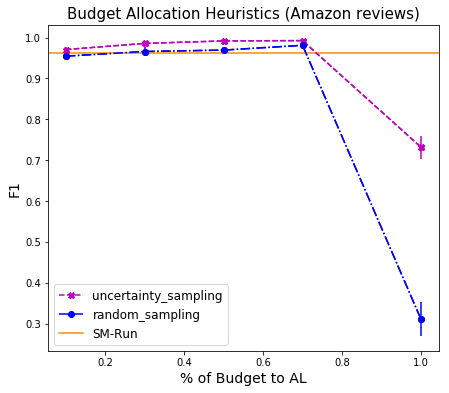

In [33]:
file_name = '5000_reviews_lemmatized_experiment_nums_10_ninstq_100.csv'
b_per_item = 7
# y_lim = (0.925, 1.01)
title = 'Budget Allocation Heuristics (Amazon reviews)'
plot_heuristics(file_name, b_per_item, title)

## 1.2 Classification cost (Amazon Reviews)

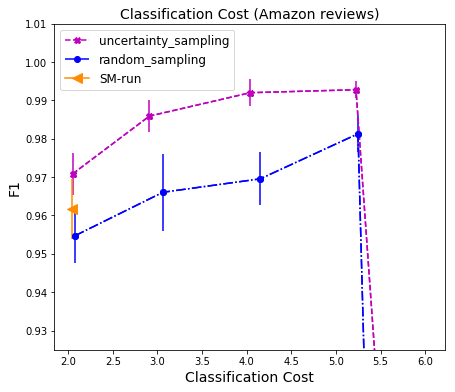

In [83]:
file_name = '5000_reviews_lemmatized_experiment_nums_10_ninstq_100.csv'
b_per_item = 7
y_lim = (0.925, 1.01)
title = 'Classification Cost (Amazon reviews)'
plot_clf_cost(file_name, b_per_item, title, y_lim)

## 1. 3 Vary available Budget (Amazon Reviewes)

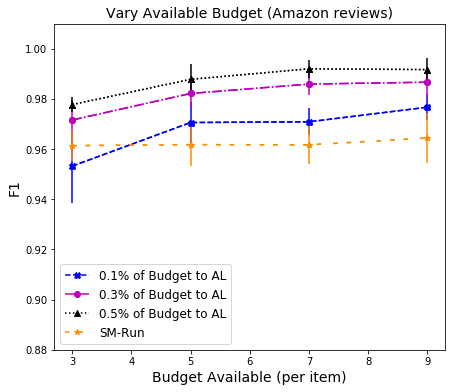

In [68]:
file_name = '5000_reviews_lemmatized_experiment_nums_10_ninstq_100.csv'
title = 'Vary Available Budget (Amazon reviews)'
plot_budget(file_name, title, [ 0.1, 0.3, 0.5], 'uncertainty_sampling', (0.88, 1.01))

## 1.4 Vary Crowd Accuracy (Amazon Reviews) (TODO)

In [22]:
# file_name = 'adaptive_machines_and_crowd/5000_reviews_lemmatized_experiment_nums_10_ninstq_100_vary_crowd_acc.csv'
# b_per_item = 6
# title = 'Vary Crowd Accuracy (Amazon reviews)'
# plot_crowd_acc(file_name, b_per_item, title, [ 0.1, 0.3, 0.5, -1], 'objective_aware_sampling')

For adaptive policy we collect 500 training samples per predicate as bern in. If within we do not improve Fbeta by 2point wihint (10 iteration == 500 more samples) -> stop

## 2.1 Budget Allocation Heuristics (Medical abstracts)

In [8]:
# file_name = 'ohsumed_C14_C23_1grams_experiment_nums_10_ninstq_100.csv'
# b_per_item = 6
# y_lim = (0.75, 0.97)
# title = 'Budget Allocation Heuristics (Medical abstracts)'
# plot_heuristics(file_name, b_per_item, title)

## 2.2 Classification cost (Medical abstracts)

In [9]:
# file_name = 'ohsumed_C14_C23_1grams_experiment_nums_10_ninstq_100.csv'
# b_per_item = 6
# title = 'Classification Cost (Medical Abstracts)'
# plot_clf_cost(file_name, b_per_item, title)

## 2. 3 Vary available Budget (Medical Abstracts)

In [10]:
# file_name = 'ohsumed_C14_C23_1grams_experiment_nums_10_ninstq_100.csv'
# b_per_item = 6
# title = 'Vary Available Budget (Medical Abstracts)'
# plot_budget(file_name, title, [ 0.1, 0.3, 0.5, -1], 'uncertainty_sampling')

## 2.4 Vary Crowd Accuracy (Medical Abstracts)

In [11]:
# file_name = 'ohsumed_C14_C23_1grams_experiment_nums_10_ninstq_100_vary_crowd_acc.csv'
# b_per_item = 6
# title = 'Vary Crowd Accuracy (Medical Abstracts)'
# plot_crowd_acc(file_name, b_per_item, title, [ 0.1, 0.3, 0.5, -1], 'objective_aware_sampling')

## 2.5 Vary Crowd Accuracy Vs Cost (Medical Abstracts)

In [12]:
# file_name = 'ohsumed_C14_C23_1grams_experiment_nums_10_ninstq_100_vary_crowd_acc.csv'
# b_per_item = 6
# title = 'Vary Crowd Accuracy (Medical Abstracts)\n (Crowd accuracy[dots] increases from bottom left to up)'
# plot_clf_cost_crowd_acc(file_name, b_per_item, title, [ 0., 0.1, 0.5, -1], 'objective_aware_sampling')

## 3.1 Budget Allocation Heuristics (SLR)

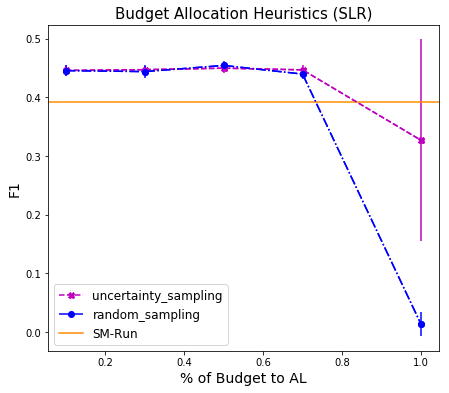

In [72]:
file_name = 'loneliness-dataset-2018_experiment_nums_10_ninstq_100.csv'
b_per_item = 7
# y_lim = (0.35, 0.45)
title = 'Budget Allocation Heuristics (SLR)'
plot_heuristics(file_name, b_per_item, title)

## 3.2 Classification cost (SLR)

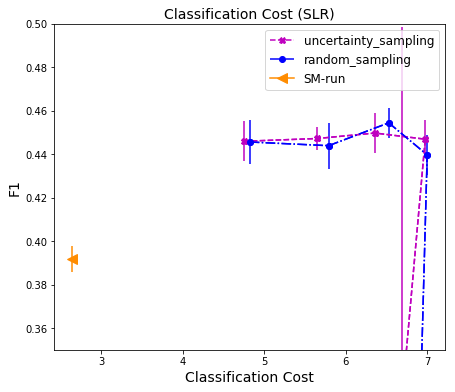

In [78]:
file_name = 'loneliness-dataset-2018_experiment_nums_10_ninstq_100.csv'
b_per_item = 7
y_lim = (0.35, 0.5)
title = 'Classification Cost (SLR)'
plot_clf_cost(file_name, b_per_item, title, y_lim)

## 3. 3 Vary available Budget (SLR)

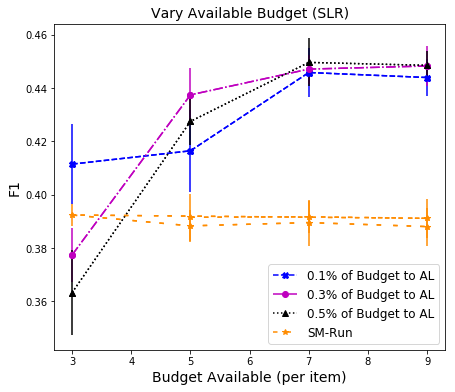

In [76]:
file_name = 'loneliness-dataset-2018_experiment_nums_10_ninstq_100.csv'
title = 'Vary Available Budget (SLR)'
plot_budget(file_name, title, [ 0.1, 0.3, 0.5], 'uncertainty_sampling')

## 3.4 Vary Crowd Accuracy (SLR)

In [ ]:
# file_name = 'loneliness-dataset-2018_experiment_nums_10_ninstq_100_vary_crowd_acc.csv'
# b_per_item = 6
# title = 'Vary Crowd Accuracy (SLR)'
# plot_crowd_acc(file_name, b_per_item, title, [ 0.1, 0.3, 0.5, -1], 'objective_aware_sampling')

## 3.5 Vary Crowd Accuracy Vs Cost (SLR)

In [ ]:
# file_name = 'loneliness-dataset-2018_experiment_nums_10_ninstq_100_vary_crowd_acc.csv'
# b_per_item = 6
# title = 'Vary Crowd Accuracy (SLR)\n (Crowd accuracy[dots] increases from bottom left to up)'
# plot_clf_cost_crowd_acc(file_name, b_per_item, title, [ 0., 0.1, 0.5, -1], 'objective_aware_sampling')

## 4.1 Budget Allocation Heuristics (Crowdsourced Amazon Reviews)

In [79]:
# file_name = 'real_data_1k_amazon_reviews_crowdsourced_lemmatized_experiment_nums_10_ninstq_100.csv'
# b_per_item = 6
# title = 'Budget Allocation Heuristics (Crowdsourced Amazon reviews)'
# plot_heuristics(file_name, b_per_item, title, (0.65, 0.87))


# file_name = 'binary_real_data_1k_amazon_reviews_crowdsourced_lemmatized_experiment_nums_10_ninstq_100.csv'
# title = 'Budget Allocation Heuristics\n(Crowdsourced Amazon reviews, Single classifier)'
# plot_heuristics(file_name, b_per_item, title, (0.65, 0.87))

## 4.2 Classification cost (Crowdsourced Amazon Reviews)

In [80]:
# file_name = 'real_data_1k_amazon_reviews_crowdsourced_lemmatized_experiment_nums_10_ninstq_100.csv'
# b_per_item = 6
# title = 'Classification Cost (Crowdsourced Amazon reviews)'
# plot_clf_cost(file_name, b_per_item, title)

# file_name = 'binary_real_data_1k_amazon_reviews_crowdsourced_lemmatized_experiment_nums_10_ninstq_100.csv'
# title = 'Classification Cost\n(Crowdsourced Amazon reviews, SIngle classifier)'
# plot_clf_cost(file_name, b_per_item, title)

## 4. 3 Vary available Budget (Crowdsourced Amazon Reviewes)

In [81]:
# file_name = 'real_data_1k_amazon_reviews_crowdsourced_lemmatized_experiment_nums_10_ninstq_100.csv'
# title = 'Vary Available Budget (Crowdsourced Amazon reviews)'
# plot_budget(file_name, title, [ 0.1, 0.3, 0.5, -1], 'uncertainty_sampling')

# file_name = 'binary_real_data_1k_amazon_reviews_crowdsourced_lemmatized_experiment_nums_10_ninstq_100.csv'
# title = 'Vary Available Budget\n(Crowdsourced Amazon reviews, Single classifier)'
# plot_budget(file_name, title, [ 0.1, 0.3, 0.5, -1], 'uncertainty_sampling')